In [14]:
import numpy as np
np.warnings.filterwarnings('ignore')
np.random.seed(1001)

import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# from tqdm import tqdm_notebook
# from sklearn.model_selection import StratifiedKFold

import IPython.display as ipd
import wave
from scipy.io import wavfile

Matplotlib is building the font cache; this may take a moment.


In [7]:
DATADIR = '/Users/tune/Dropbox/voice/voip'
fname = os.path.join(DATADIR, 'No849_2_193.wav')

In [8]:
wav = wave.open(fname)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  44100
Total samples (frames) =  219547
Duration =  4.978390022675737


In [15]:
rate, data = wavfile.read(fname)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (219547,)
[-14 -29 -14 ... 164 152  98]


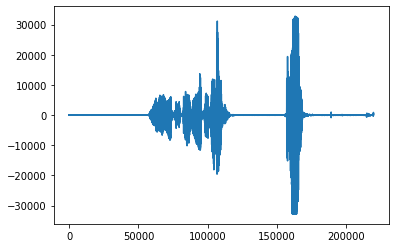

In [16]:
plt.plot(data, '-', )

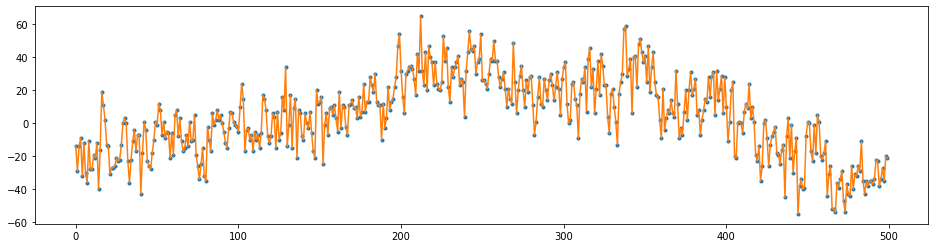

In [26]:
plt.figure(figsize=(16, 4))
plt.plot(data[:500], '.'); plt.plot(data[:500], '-')

In [59]:
import librosa
SAMPLE_RATE = 44100
wav, _ = librosa.core.load(fname, sr=SAMPLE_RATE)

In [28]:
###### MFCC
wav = wav[:2*44100]

mfcc = librosa.feature.mfcc(wav, sr = SAMPLE_RATE, n_mfcc=40)
mfcc.shape



(40, 173)

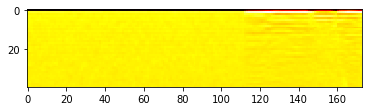

In [29]:
plt.imshow(mfcc, cmap='hot', interpolation='nearest');

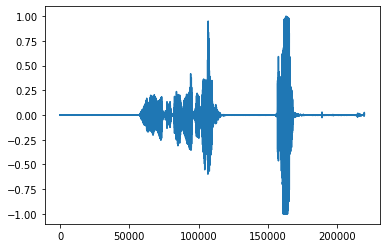

In [54]:
### 無音削除
plt.plot(wav)

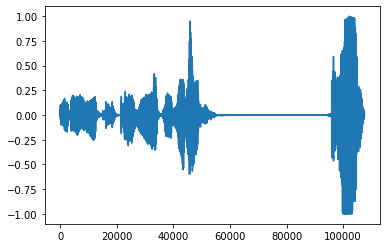

In [60]:
wav_, _ = librosa.effects.trim(wav, 20)
plt.plot(wav_)

In [61]:
#### 書き出し
wavfile.write('out.wav', SAMPLE_RATE, wav_)